# Анализ динамики продаж смартфонов за год и выявление товаров-лидеров

Компания М занимается розничной продажей смартфонов. Представлены данные о продажах данной компании в промежутке от 01 августа 2022 до 01 августа 2023. Необходимо выявить динамику продаж и определить товары, которые занимают лидирующие позиции по количеству продаж.

---
Имеется 2 файла с исходными данными:
* Файл с ассортиментом магазина и актуальной ценой на товары;
* Файл с продажами за год.

Исходные данные представлены в необработанном виде.
Файл с ассортиментом (SmartPhones.csv) содержит следующие столбцы:
* **Идентификатор телефона (id_phone) – int;**
* **Название телефона (phone name) - varchar;**
* **Цена телефона (price) - varchar.**

Файл с продажами (Sales_phones.csv) содержит следующие столбцы:
* **Идентификатор продажи (Id_sale) - int;**
* **Идентификатор телефона (Id_phone) - int;**
* **Дата продажи - (date_of_sale) - varchar;**
* **Количество проданных смартфонов - (quantity) - varchar.**

Файлы связаны друг с другом по полю идентификатора телефона (id_phone)

---
### Задачи

* Необходимо загрузить данные и исправить в них ошибки;
* Привести данные к правильным типам;
* Провести обработку данных - удалить дубликаты, пустые значения, избавиться от выбросов;
* Объединить два набора данных в один и устранить возникшие проблемы;
* Вывести статистику по данным и проверить их распределение на нормальность;
* Провести исследоватьский анализ данных: определить динамику продаж в течение года, найти позиции товаров, которые занимают лидирующие позиции по продажам, а также рассчитать продуктовые метрики;
* Сделать выводы.
---

## Импорт библиотек и загрузка данных

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Загрузим файл с продажами

In [3]:
path = '/kaggle/input/sales-of-smartphones/Sales_phones.csv' 
sales = pd.read_csv(path)

Данные выглядят следующим образом:

In [4]:
sales.head()

,Id_sale,Id_phone,date_of_sale,quantity;;;;
0,1,15,01.08.2022,1;;;;
1,2,19,01.08.2022,1;;;;
2,3,6,01.08.2022,1;;;;
3,4,12,01.08.2022,1;;;;
4,5,4,01.08.2022,1;;;;


Загрузим файл с ассортиментом и ценой

In [5]:
path = '/kaggle/input/sales-of-smartphones/SmartPhones.csv' 
phones = pd.read_csv(path)

Данные выглядят следующим образом:

In [6]:
phones.head()

,id_phone,phone name,price;;;
0,1,Apple iPhone 14 Pro,119000;;;
1,2,Apple iPhone 14 Pro Max,123000;;;
2,3,Apple iPhone 14,86000;;;
3,4,Apple iPhone SE,46000;;;
4,5,Apple iPhone 13,80000;;;


Можно увидеть, что данные загружены не совсем корректно. В названиях столбцов и значениях присутствуют лишние символы ";". Исправим это.

Исправим ошибку в наборе данных с продажами:

In [7]:
sales.rename(columns = {'quantity;;;;':'quantity'}, inplace = True )

In [8]:
sales['quantity'] = sales['quantity'].map(lambda x: x.rstrip(';'))

Исправим данную ошибку в наборе данных с товарами:

In [9]:
phones.rename(columns = {'price;;;':'price'}, inplace = True )

In [10]:
phones['price'] = phones['price'].map(lambda x: x.rstrip(';'))

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id_sale       2427 non-null   int64 
 1   Id_phone      2427 non-null   int64 
 2   date_of_sale  2427 non-null   object
 3   quantity      2427 non-null   object
dtypes: int64(2), object(2)
memory usage: 76.0+ KB


Исправим заглавные буквы в названии столбцов "Id_sale" и "Id_phone" на прописные для удобства.

In [12]:
sales.rename(columns = {'Id_sale':'id_sale'}, inplace = True )
sales.rename(columns = {'Id_phone':'id_phone'}, inplace = True )

Проверим уникальные значения столбца с датами для поиска ошибочных значений

In [14]:
sales['date_of_sale'].unique()

array(['01.08.2022', '02.08.2022', '03.08.2022', '04.08.2022',
       '05.08.2022', '06.08.2022', '07.08.2022', '08.08.2022',
       '09.08.2022', '10.08.2022', '11.08.2022', '12.08.2022',
       '13.08.2022', '14.08.2022', '15.08.2022', '16.08.2022',
       '17.08.2022', '18.08.2022', '19.08.2022', '20.08.2022',
       '21.08.2022', '22.08.2022', '23.08.2022', '24.08.2022',
       '25.08.2022', '26.08.2022', '27.08.2022', '28.08.2022',
       '29.08.2022', '30.08.2022', '31.08.2022', '01.09.2022',
       '02.09.2022', '03.09.2022', '04.09.2022', '05.09.2022',
       '06.09.2022', '07.09.2022', '08.09.2022', '09.09.2022',
       '10.09.2022', '11.09.2022', '12.09.2022', '13.09.2022',
       '14.09.2022', '15.09.2022', '16.09.2022', '17.09.2022',
       '18.09.2022', '19.09.2022', '20.09.2022', '21.09.2022',
       '22.09.2022', '23.09.2022', '24.09.2022', '25.09.2022',
       '26.09.2022', '27.09.2022', '28.09.2022', '29.09.2022',
       '30.09.2022', '01.10.2022', '02.10.2022', '03.10

Можно заметить, что в столбце с датами, помимо самих дат, присутствуют ошибочные значения "none". Их необходимо удалить из данных

Также проверим, нет ли в данном столбце выбросов, которые не входят в промежуток от 01.08.2022 до 01.08.2023

In [15]:
sales.sort_values(by='date_of_sale', ascending=True).iloc[:10]

,id_sale,id_phone,date_of_sale,quantity
1059,1060,18,00.01.1900,1
1502,1503,3,00.01.1900,1
1421,1422,3,00.01.1900,1
1339,1340,1,00.01.1900,1
1295,1296,14,00.01.1900,1
1041,1042,1,01.01.2023,1
1042,1043,20,01.01.2023,1
1043,1044,15,01.01.2023,1
1044,1045,14,01.01.2023,1
1045,1046,9,01.01.2023,1


В данных присутствует несколько лишних значений. Удалим эти записи.

In [16]:
sales = sales[sales.date_of_sale != "none"]
sales.reset_index(drop= True , inplace= True )

In [17]:
sales = sales[sales.date_of_sale != "00.01.1900"]
sales.reset_index(drop= True , inplace= True )

Изменим формат даты столбца с датой.

In [18]:
sales['date_of_sale'] = pd.to_datetime(sales['date_of_sale'], format='%d.%m.%Y')

In [19]:
sales.head()

,id_sale,id_phone,date_of_sale,quantity
0,1,15,2022-08-01,1
1,2,19,2022-08-01,1
2,3,6,2022-08-01,1
3,4,12,2022-08-01,1
4,5,4,2022-08-01,1


Но этого недостаточно. Для наглядности построим помесячный график данных.

In [20]:
sales_date = sales["date_of_sale"]
sales_date = sales_date.to_frame (name='date_of_sale')
sales_date

<Axes: xlabel='date_of_sale,date_of_sale'>

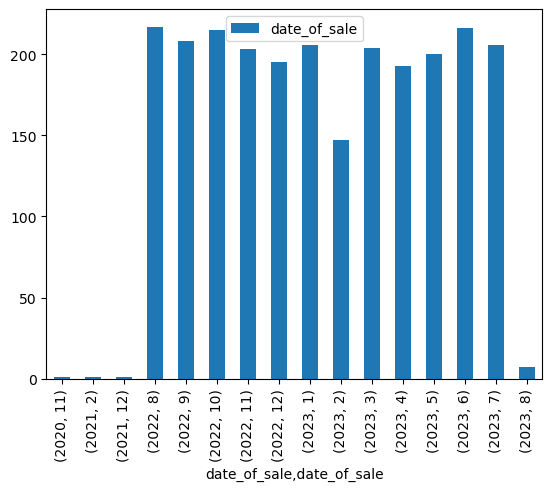

In [23]:
sales_date.groupby([sales_date["date_of_sale"].dt.year, sales_date["date_of_sale"].dt.month]).count().plot(kind="bar")

Можно заметить, что в данных наблюдаются выбросы (лишние значения за 2020 и 2021 года). Очистим набор данных от выбросов.

In [24]:
sales = sales[sales.date_of_sale >= "2022-08-01"]
sales.reset_index(drop= True , inplace= True )

Также в набор данных попали значения за первый день августа 2023. Их также стоит убрать из рассмотрения.

In [25]:
sales = sales[sales.date_of_sale <= "2023-07-31"]
sales.reset_index(drop= True , inplace= True )

<Axes: xlabel='date_of_sale,date_of_sale'>

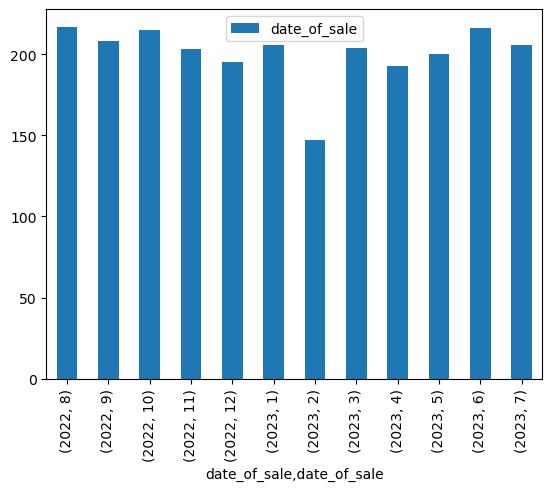

In [26]:
sales_date = sales["date_of_sale"]
sales_date = sales_date.to_frame (name='date_of_sale')
sales_date.groupby([sales_date["date_of_sale"].dt.year, sales_date["date_of_sale"].dt.month]).count().plot(kind="bar")

Теперь выбросы в столбце с датой отсутствуют

Проверим данный столбец на наличии пустых значений

In [27]:
sales[sales['date_of_sale'] == ''].index

Int64Index([], dtype='int64')

Пустые значения отсутствуют

Теперь проверим этот столбец на наличие неопределённых значений

In [28]:
date_isna = pd.isna(sales['date_of_sale'])
date_isna.unique()

array([False])

Они также отсутствуют.

**Обработка стообца date_of_sale завершена.**

<font size="4">Переходим к столбцу quantity

Проверка на уникальные значения.

In [29]:
sales['quantity'].unique()

array(['1', '2', '4', '5', '3'], dtype=object)

Проверка на наличие пустых значений.

In [30]:
sales[sales['quantity'] == ''].index

Int64Index([], dtype='int64')

Проверка на наличие неопределённых значений.

In [31]:
quan_isna = pd.isna(sales['quantity'])
quan_isna.unique()

array([False])

Переведём тип данных данного столбца в числовой.

In [32]:
sales['quantity'] = pd.to_numeric(sales['quantity'])

<font size="4">Столбец id_phone

Построим график и проверим на наличие выбросов

<Axes: >

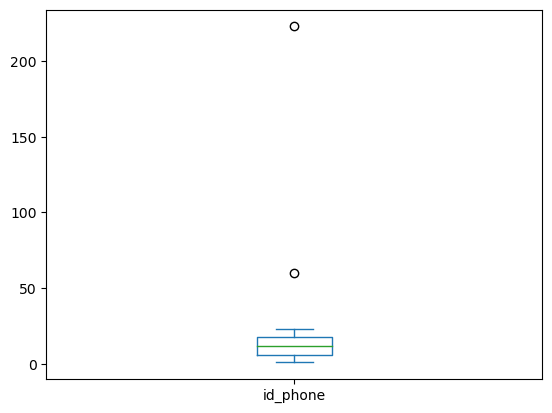

In [33]:
sales['id_phone'].plot(kind='box')

Из графика видно, что в данных присутствуют выбросы. Определим их.

In [34]:
uniq_phone = sales['id_phone'].unique()
print(sorted(uniq_phone))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 60, 223]


Удалим значения "60" и "223" из набора данных.

In [35]:
sales = sales[sales.id_phone < 24 ]
sales.reset_index(drop= True , inplace= True )

In [36]:
sales[sales['id_phone'] == ''].index

Int64Index([], dtype='int64')

In [37]:
phone_isna = pd.isna(sales['id_phone'])
phone_isna.unique()

array([False])

<font size="4">Столбец Id_sale

Построим график и првоерим на наличие выбросов.

<Axes: >

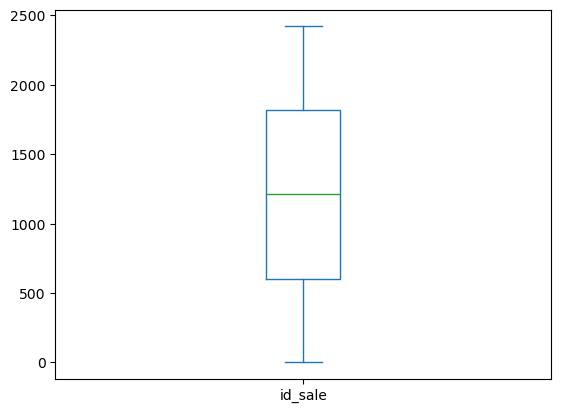

In [38]:
sales['id_sale'].plot(kind='box')

Выбросы отсутствуют.

In [39]:
sales[sales['id_sale'] == ''].index

Int64Index([], dtype='int64')

In [40]:
sale_isna = pd.isna(sales['id_sale'])
sale_isna.unique()

array([False])

Проверим столбец на дубликаты

In [41]:
duplicate_sale = sales[sales.duplicated(['id_sale'])]
duplicate_sale

,id_sale,id_phone,date_of_sale,quantity


Дубликаты отсутствуют.

<font size="4">Переходим к набору данных с ассортиментом товаров. Столбце price.

Переведём тип данных в числовой.

In [43]:
phones['price'] = pd.to_numeric(phones['price'])
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_phone    23 non-null     int64 
 1   phone name  23 non-null     object
 2   price       23 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 680.0+ bytes


Проверим на наличие выбросов.

<Axes: >

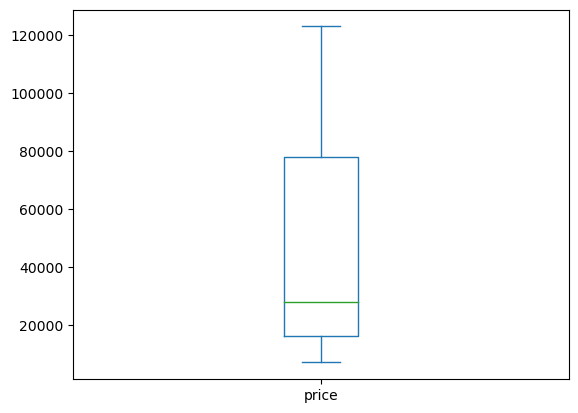

In [44]:
phones['price'].plot(kind='box')

In [45]:
phones[phones['price'] == ''].index

Int64Index([], dtype='int64')

In [46]:
price_isna = pd.isna(phones['price'])
price_isna.unique()

array([False])

<font size="4">Столбец name

Изменим название столбца

In [47]:
phones.rename(columns = {'phone name':'phone_name'}, inplace = True )

In [48]:
phones[phones['phone_name'] == ''].index

Int64Index([], dtype='int64')

In [49]:
name_isna = pd.isna(phones['phone_name'])
name_isna.unique()

array([False])

<font size="4">Столбец Id_phone

In [50]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_phone    23 non-null     int64 
 1   phone_name  23 non-null     object
 2   price       23 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 680.0+ bytes


Првоерим на наличие выбросов.

<Axes: >

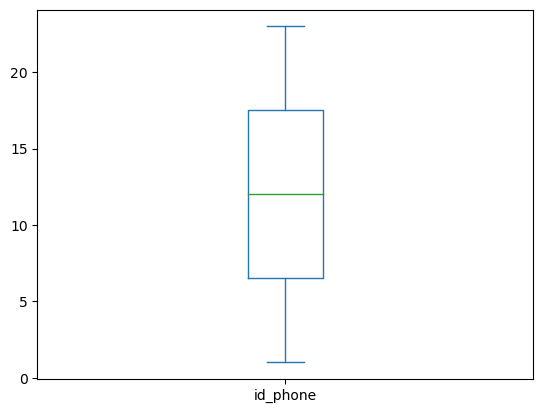

In [51]:
phones['id_phone'].plot(kind='box')

In [52]:
phones[phones['id_phone'] == ''].index

Int64Index([], dtype='int64')

In [53]:
phones_isna = pd.isna(phones['id_phone'])
phones_isna.unique()

array([False])

Переходим объединению данных.

## Объединение данных

Для дальнейшего анализа необходимо объединить два датасета в один. Объединение следует проводить по ключу id_phone. Также необходимо рассчитать новый столбец, который будет показывать сумму продажи по каждой операции по формуле price * quantity.

In [54]:
ps = pd.merge(sales, phones, on='id_phone', how='inner',).sort_values(by=['id_sale'])
ps.reset_index(drop= True , inplace= True )
ps = ps[['id_sale', 'id_phone', 'phone_name', 'date_of_sale', 'quantity', 'price']]
ps

,id_sale,id_phone,phone_name,date_of_sale,quantity,price
0,1,15,Xiaomi Redmi Note 12,2022-08-01,1,16000
1,2,19,realme C31,2022-08-01,1,7000
2,3,6,Apple iPhone 13 Pro,2022-08-01,1,89000
3,4,12,Samsung Galaxy A34,2022-08-01,1,28000
4,5,4,Apple iPhone SE,2022-08-01,1,46000
...,...,...,...,...,...,...
2403,2416,17,Xiaomi Redmi 10 2022,2023-07-31,1,10000
2404,2417,2,Apple iPhone 14 Pro Max,2023-07-31,1,123000
2405,2418,2,Apple iPhone 14 Pro Max,2023-07-31,1,123000
2406,2419,13,Samsung Galaxy S22,2023-07-31,1,55000


Рассчитаем столбец с суммой продажи:

In [55]:
ps['sum_of_sale'] = ps['quantity'] * ps['price']
ps

,id_sale,id_phone,phone_name,date_of_sale,quantity,price,sum_of_sale
0,1,15,Xiaomi Redmi Note 12,2022-08-01,1,16000,16000
1,2,19,realme C31,2022-08-01,1,7000,7000
2,3,6,Apple iPhone 13 Pro,2022-08-01,1,89000,89000
3,4,12,Samsung Galaxy A34,2022-08-01,1,28000,28000
4,5,4,Apple iPhone SE,2022-08-01,1,46000,46000
...,...,...,...,...,...,...,...
2403,2416,17,Xiaomi Redmi 10 2022,2023-07-31,1,10000,10000
2404,2417,2,Apple iPhone 14 Pro Max,2023-07-31,1,123000,123000
2405,2418,2,Apple iPhone 14 Pro Max,2023-07-31,1,123000,123000
2406,2419,13,Samsung Galaxy S22,2023-07-31,1,55000,55000


Полученная версия данных считается финальной. Этап статистической
обработки данных завершается и наступает переход к следующей части исследования.

### Статистика данных

Проверим типы данных:

In [56]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_sale       2408 non-null   int64         
 1   id_phone      2408 non-null   int64         
 2   phone_name    2408 non-null   object        
 3   date_of_sale  2408 non-null   datetime64[ns]
 4   quantity      2408 non-null   int64         
 5   price         2408 non-null   int64         
 6   sum_of_sale   2408 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 131.8+ KB


Количество уникальных записей в каждом столбце:

In [57]:
ps.nunique()

id_sale         2408
id_phone          23
phone_name        23
date_of_sale     362
quantity           5
price             21
sum_of_sale       38
dtype: int64

Статистика по данным:

In [58]:
ps.describe()

,id_sale,id_phone,quantity,price,sum_of_sale
count,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000
mean,1210.678571,11.889535,1.020764,46625.830565,47431.478405
std,700.327012,6.665322,0.202766,37758.486630,39992.867530
min,1.000000,1.000000,1.000000,7000.000000,7000.000000
25%,602.750000,6.000000,1.000000,16000.000000,16000.000000
50%,1210.500000,12.000000,1.000000,28000.000000,28000.000000
75%,1818.250000,18.000000,1.000000,80000.000000,80000.000000
max,2420.000000,23.000000,5.000000,123000.000000,476000.000000


### Проверка распределения данных на нормальность

Построим график распределения для суммы продаж

/tmp/ipykernel_32/3033532867.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ps['sum_of_sale'])


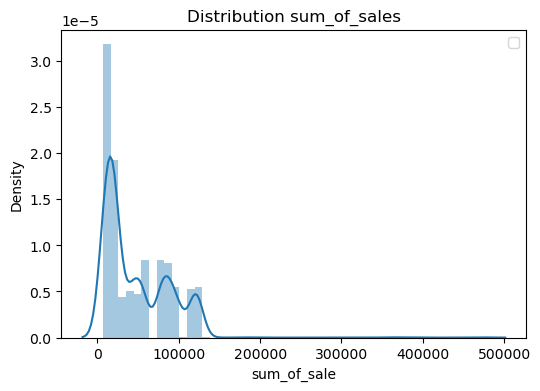

In [59]:
f, ax = plt.subplots(1, figsize=(6,4))
sns.distplot(ps['sum_of_sale'])
plt.title('Distribution sum_of_sales')
plt.legend()
plt.subplots_adjust(hspace = 0.3)

Проверка статистических гипотез о нормальности распределения с помощью теста **Шапиро–Уилка

* H0: Данные имеют нормальное распределение
* H1: Данные имеют ненормальное распределение

Результат теста Шапиро-Уилка:

In [60]:
test_stat, pvalue = shapiro(ps["sum_of_sale"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.8246, p-value = 0.0000


Поскольку значение p<=0,05, то нулевая гипотеза отвергается. Данные имеют ненормальное распределение

## Исследовательский анализ данных

Необходимо определить общую динамику продаж в течение года, найти позиции товаров, которые занимают лидирующие позиции по продажам, а также рассчитать продуктовые метрики.

Общая сумма и количество продаж за год:

In [61]:
ps[['quantity', 'sum_of_sale']].sum ()

quantity            2458
sum_of_sale    114215000
dtype: int64

Сгруппируем данные помесячно.

In [62]:
gps=ps.groupby(pd.Grouper(key='date_of_sale', axis=0, freq='M')).sum().reset_index()
gps

/tmp/ipykernel_32/1524478787.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gps=ps.groupby(pd.Grouper(key='date_of_sale', axis=0, freq='M')).sum().reset_index()


,date_of_sale,id_sale,id_phone,quantity,price,sum_of_sale
0,2022-08-31,23653,2730,239,9820000,10563000
1,2022-09-30,66872,2362,212,10068000,10351000
2,2022-10-31,114595,2605,216,9480000,9500000
3,2022-11-30,150668,2510,208,8964000,9074000
4,2022-12-31,183871,2282,196,9410000,9465000
5,2023-01-31,233681,2491,204,9182000,9182000
6,2023-02-28,194789,1626,147,7501000,7501000
7,2023-03-31,306590,2336,210,10331000,10474000
8,2023-04-30,328486,2284,199,9023000,9375000
9,2023-05-31,379700,2278,201,9253000,9299000


Среднемесячное количество и сумма продаж:

In [64]:
gpsm =gps[['quantity', 'sum_of_sale']].mean ()
gpsm.round(decimals=2)

quantity           204.83
sum_of_sale    9517916.67
dtype: float64

Построим график, который показывают динамику выручки за год

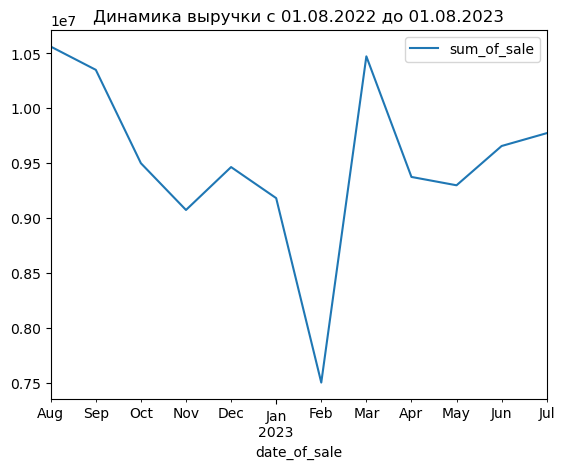

In [65]:
gps.plot(x="date_of_sale", y='sum_of_sale')
plt.title('Динамика выручки с 01.08.2022 до 01.08.2023')
plt.show()

Из графика можно заметить, что в феврале произошёл спад по продажам. Посмотроим, сколько это составило в процентом соотношении:

In [66]:
gps['%_of_quantity'] = 100 * gps['quantity'] / gps['quantity'].sum()
gps['%_of_sum_of_sale'] = 100 * gps['sum_of_sale'] / gps['sum_of_sale'].sum()
gps = gps[['date_of_sale', 'quantity', '%_of_quantity', 'sum_of_sale', '%_of_sum_of_sale']]
gps

,date_of_sale,quantity,%_of_quantity,sum_of_sale,%_of_sum_of_sale
0,2022-08-31,239,9.723352,10563000,9.248347
1,2022-09-30,212,8.624898,10351000,9.062733
2,2022-10-31,216,8.787632,9500000,8.317647
3,2022-11-30,208,8.462164,9074000,7.944666
4,2022-12-31,196,7.973963,9465000,8.287003
5,2023-01-31,204,8.299430,9182000,8.039224
6,2023-02-28,147,5.980472,7501000,6.567439
7,2023-03-31,210,8.543531,10474000,9.170424
8,2023-04-30,199,8.096013,9375000,8.208204
9,2023-05-31,201,8.177380,9299000,8.141663


Рассчитаем средний чек продаж за год:

In [81]:
aps = ps['sum_of_sale'].sum () / ps['quantity'].sum()
aps

46466.639544344995

Теперь рассчитаем средний чек по каждому месяцу:

In [83]:
gps['average_check'] = gps['sum_of_sale'] / gps['quantity']
gps = gps[['date_of_sale', 'quantity', '%_of_quantity', 'sum_of_sale', '%_of_sum_of_sale','average_check']]
gps

,date_of_sale,quantity,%_of_quantity,sum_of_sale,%_of_sum_of_sale,average_check
0,2022-08-31,239,9.723352,10563000,9.248347,44196.652720
1,2022-09-30,212,8.624898,10351000,9.062733,48825.471698
2,2022-10-31,216,8.787632,9500000,8.317647,43981.481481
3,2022-11-30,208,8.462164,9074000,7.944666,43625.000000
4,2022-12-31,196,7.973963,9465000,8.287003,48290.816327
5,2023-01-31,204,8.299430,9182000,8.039224,45009.803922
6,2023-02-28,147,5.980472,7501000,6.567439,51027.210884
7,2023-03-31,210,8.543531,10474000,9.170424,49876.190476
8,2023-04-30,199,8.096013,9375000,8.208204,47110.552764
9,2023-05-31,201,8.177380,9299000,8.141663,46263.681592


Топ 5 моделей по количеству продаж за весь год

In [84]:
top_year_quan = ps.groupby(['phone_name']).quantity.value_counts().nlargest(5)
top_year_quan = top_year_quan.to_frame (name='quantity')
top_year_quan

,,quantity
phone_name,quantity,
Samsung Galaxy A24,1,125
Apple iPhone 14 Pro Max,1,123
Apple iPhone 13 Pro Max,1,121
Apple iPhone 14 Pro,1,118
realme C55,1,115


Результаты показыывают, что лидером по количеству продаж является смартфон "Samsung Galaxy A24".

Топ 5 моделей по сумме продаж за весь год

In [85]:
top_year_sum = ps.groupby(['phone_name']).sum_of_sale.sum().nlargest(5)
top_year_sum = top_year_sum.to_frame (name='sum_of_sale')
top_year_sum

,sum_of_sale
phone_name,
Apple iPhone 14 Pro Max,15498000
Apple iPhone 14 Pro,14518000
Apple iPhone 13 Pro Max,12177000
Apple iPhone 13 Pro,8544000
Apple iPhone 14,7912000


Однако по сумме продаж модель "Samsung Galaxy A24" не входит в пятёрку. Все 5 мест занимают продукты на Apple. Это связано с их относительно высокой ценой на данные модели, а также с большой популярностью у покупателей, т.к. по количествую продаж большинство из данных моделей также в топе.

In [86]:
top_year_sum = ps.groupby(['phone_name']).sum_of_sale.sum().nlargest(15)
top_year_sum = top_year_sum.to_frame (name='sum_of_sale')
top_year_sum

,sum_of_sale
phone_name,
Apple iPhone 14 Pro Max,15498000
Apple iPhone 14 Pro,14518000
Apple iPhone 13 Pro Max,12177000
Apple iPhone 13 Pro,8544000
Apple iPhone 14,7912000
Apple iPhone 13,7600000
Apple iPhone 12,7144000
Samsung Galaxy S22,5500000
Apple iPhone SE,5290000


Смартфон "Samsung Galaxy A24" по принесённой выручке занимает только 14 место. Это указывает на то, что высокое количество продаж не всегда означает успех.

Топ 5 смартфонов по количеству продаж за последние 3 месяца:

In [96]:
psthr = ps[ps.date_of_sale >= '2023-05-01']
psthr.reset_index(drop= True , inplace= True )
top_month_quan = psthr.groupby(['phone_name']).quantity.value_counts().nlargest(5)
top_month_quan = top_month_quan.to_frame (name='quantity')
top_month_quan

,,quantity
phone_name,quantity,
Xiaomi Redmi A2+,1,40
Samsung Galaxy A14,1,35
Samsung Galaxy A24,1,32
Apple iPhone 13 Pro Max,1,31
Apple iPhone 14 Pro,1,31


Можно заметить, что в последние три месяца набрал популярность у покупателей смартфон "Xiaomi Redmi A2+	" - по количеству продаж он выбился в лидеры.

Топ 5 смартфонов по сумме продаж за последние 3 месяца:

In [97]:
top_month_sum = psthr.groupby(['phone_name']).sum_of_sale.sum().nlargest(5)
top_month_sum = top_month_sum.to_frame (name='sum_of_sale')
top_month_sum

,sum_of_sale
phone_name,
Apple iPhone 14 Pro Max,3690000
Apple iPhone 14 Pro,3689000
Apple iPhone 13 Pro Max,3267000
Apple iPhone 14,2150000
Apple iPhone 13,1840000


Однако основную выручку по-прежнему приносят продажи Iphone (за последние 3 месяца ситуация не изменилась)

---
## Вывод



Таким образом, можно сделать вывод, что основную выручку компании приносят новые модели смартфонов от Apple - "Apple iPhone 14 Pro Max", "Apple iPhone 14 Pro", "Apple iPhone 14", "Apple iPhone 13 Pro Max" и "Apple iPhone 13 Pro".
Компании следует сделать акцент на данных товарах. 

Однако не стоит убирать из внимания смартфоны, которые хорошо продаются - популярный за год "Samsung Galaxy A24" или набирающий поплуряность "Xiaomi Redmi A2+". Возможно стоит пересмотреть цены на данные модели для увеличения с них выручки, а также простимулировать продажи менее популярных моделей посредством рекламных компаний и акций.

Компании рекомендуется продолжать сбор данных, а также расширить метрики наблюдения для возможности проведения более глубокого анализа, который позволит увеличить финансовые показатели компании.